In [151]:
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 찾기 
font_list = [f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name]
font_list

# 폰트 설정 
# import matplotlib.font_manager as fm 
rc('font', family = 'Nanum Gothic')

In [91]:
%matplotlib inline

In [92]:
# 샘플 데이터 
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

# 0. 데이터 시각적으로 둘러보기 

## 0.1 학습 자료 
- seaborn    
    - https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
    - https://wikidocs.net/13582

 



## 0.2. 그래프 영역 여러개로 나누기

#### 1) plt.figure(figsize=(m,n))
##### - sns.set(font_scale = #) 

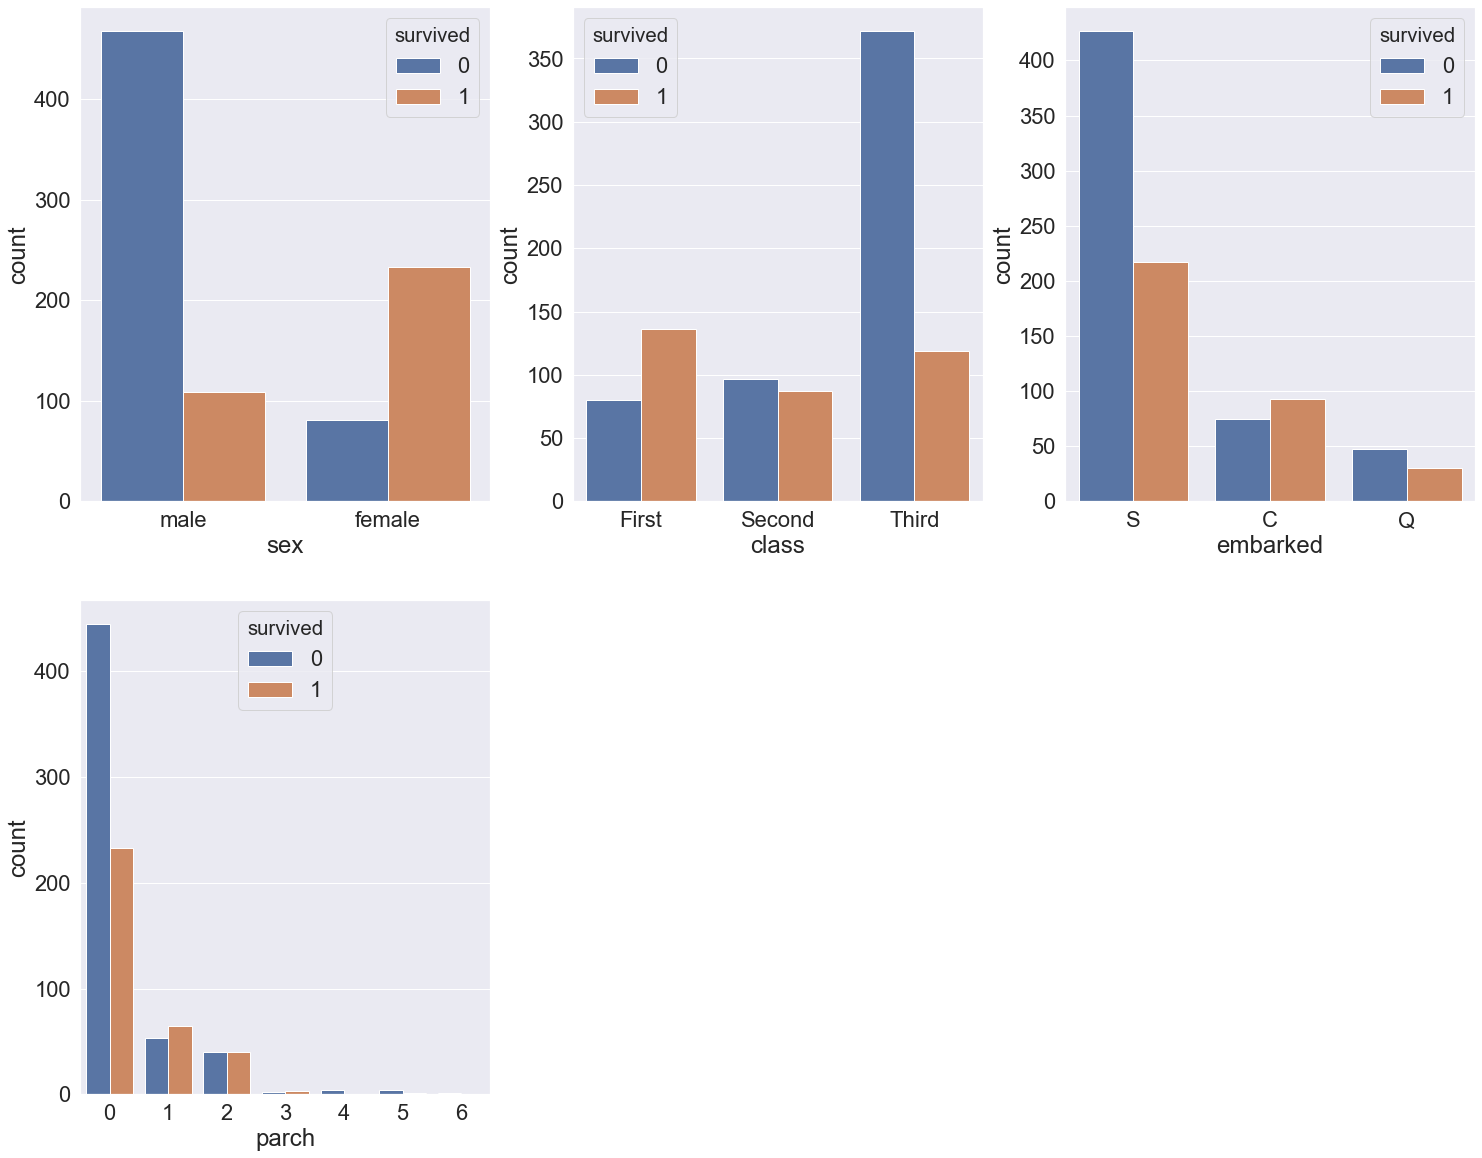

In [146]:
import matplotlib.pyplot as plt

# figure 액자를 subplot(2,3), 2x3으로 나눔 
plt.figure(figsize = (25,20))

# 글자 크기 조절 
sns.set(font_scale = 2)

# 각 그래프들을 각 위치에 배치 
plt.subplot(231)
sns.countplot(data=titanic, x='sex', hue='survived')
plt.subplot(232)
sns.countplot(data=titanic,x='class', hue='survived')
plt.subplot(233)
sns.countplot(data=titanic,x='embarked', hue='survived')
plt.subplot(234)
sns.countplot(data=titanic,x='parch', hue='survived')


In [147]:

plt.subplot(211, 1)
sns.countplot(data=titanic, x='sex', hue='survived')
plt.subplot(211, 2)
sns.countplot(data=titanic,x='class', hue='survived')dd

ValueError: Illegal argument(s) to subplot: (211, 1)

<Figure size 432x288 with 0 Axes>

###### pairgrid / pairplot

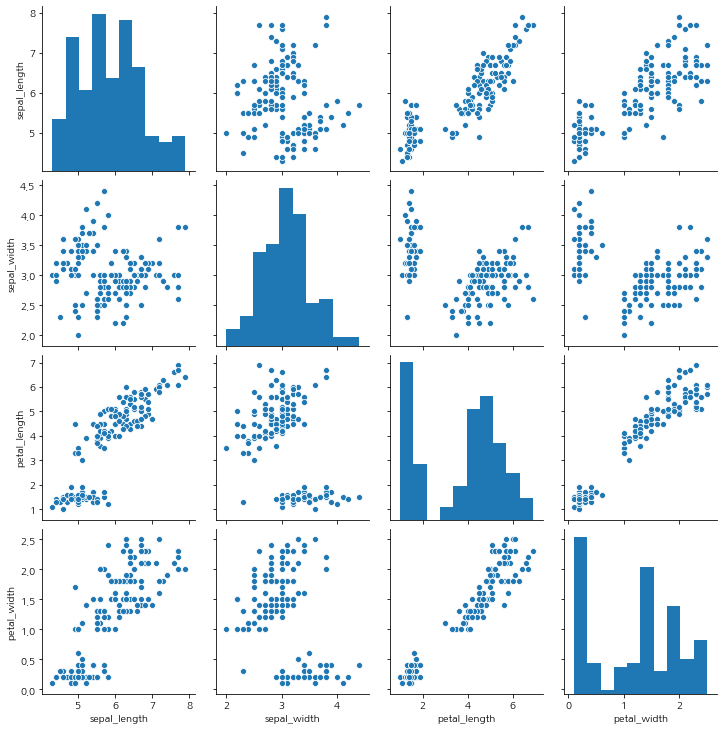

In [131]:
sns.pairplot(iris)

## 0.3. 분포 시각화 


#### 1) boxplot

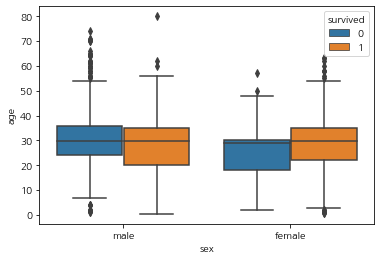

In [120]:
sns.boxplot(x=titanic.sex, y=titanic.age, hue=titanic.survived)

#### 2) countplot  - x축 : 카테고리형 자료 

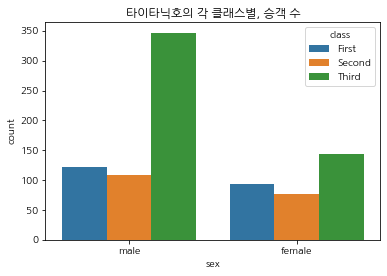

In [121]:
sns.countplot(x="sex", hue='class', data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

#### 5) distplot - x축에 연속적인 실수값이 오는 경우 + 커널 밀도, 러그 표시 
- hist = True, rug = True  
- 데이터 = 컬럼
- age와 같이 연속형 자료의 변화에 따른 추이를 분석하고자 하는 경우 
- 자료의 null값들 있는 경우 에러 -> 미리 평균값 등으로 채워줘야 함 

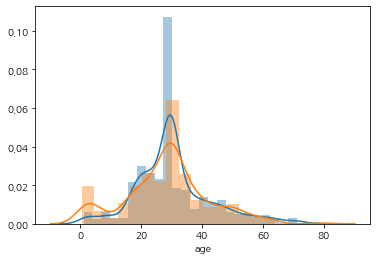

In [124]:
mean_age = titanic['age'].mean()
# age의 NaN값들을 평균값으로 채워줌 
titanic.loc[pd.isnull(titanic['age']), 'age'] = mean_age

# 죽은 사람들 컬럼 
dead_by_age = titanic[titanic['survived'] == 0]
# 산 사람들 컬럼 
survived_by_age = titanic[titanic['survived'] == 1]

sns.distplot(dead_by_age['age'], hist = True, label = 'dead')
sns.distplot(survived_by_age['age'], hist = True, label = 'survived')

#### 3) barplot - x축 : 카테고리형 자료형, y축 : 실수형 자료 

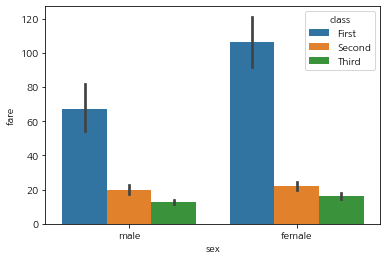

In [122]:
sns.barplot(data=titanic, x='sex', y='fare', hue='class')

#### 4) pointplot - x축 : 카테고리/연속형 자료, y축 : 실수형 자료 

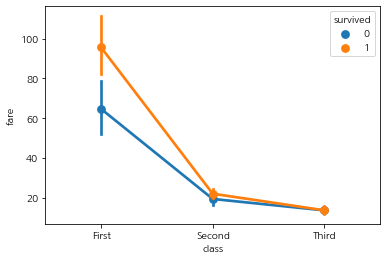

In [123]:
sns.pointplot(data=titanic, x='class', y='fare', hue='survived')

## 0.4. 관계 시각화 

#### 1) heatmap : 모든 자료형 = 실수형 변환 필요, 자료형들의 corr의 히트맵

/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jaeyeopchung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


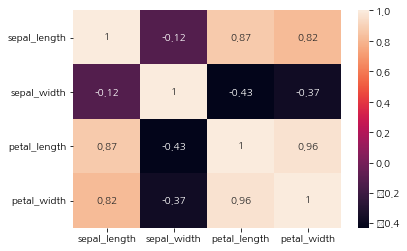

In [125]:
sns.heatmap(iris.corr(), annot = True)

#### 2) lmplot ( Scatter Plot ) : fit_reg = 회귀선 표시 여부 
- 나이, 요금, 생존의 '3가지 요소'를 한 그림에서 관계를 보고 싶다

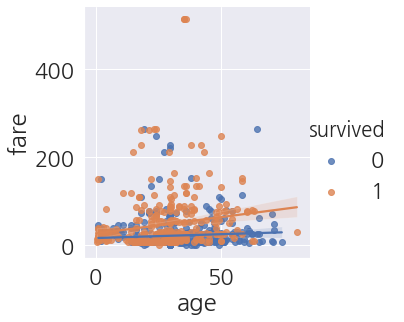

In [152]:
sns.lmplot(data=titanic, x='age', y='fare', hue='survived', fit_reg = True)

#### 3) jointplot : 2개의 데이터의 산포도 및 히스토그램 같이 확인 

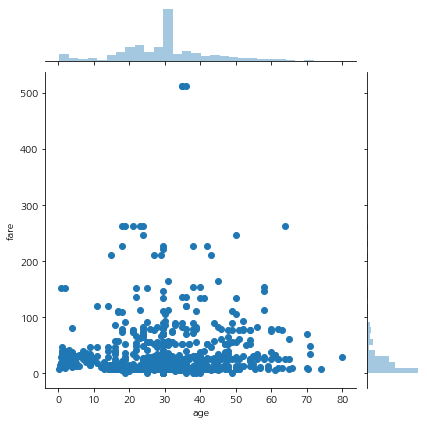

In [127]:
sns.jointplot(data=titanic, x='age', y='fare')

###### kind = 'kde', 커널 밀도 함수로 두 변수의 밀집 분포 확인 

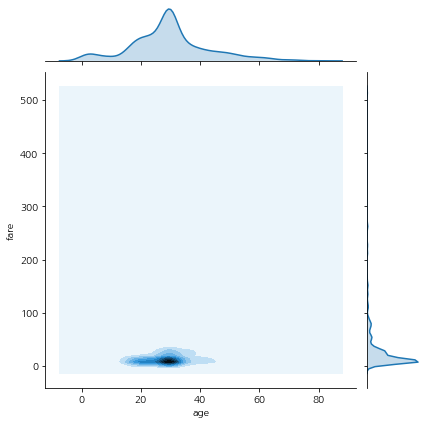

In [128]:
sns.jointplot(data=titanic, x='age', y='fare', kind='kde')

# 1. 전처리를 합시다

###### -- 전처리 가이드 --

1. 데이터 Type, Label 등이 일관적이지 않은 경우  
    - 프로그램에서 제공하는 함수를 통해 일괄적으로 변경 (예, SQL: Cast, Python: astype())
    - 날짜 : pandas datetime으로 변환

2. 데이터 Type, Label 등이 일관적이지 않은 경우  
프로그램에서 제공하는 함수를 통해 일괄적으로 변경 (예, SQL: Cast, Python: astype())

3. Missing Value
    - 샘플이 많은 경우 : 삭제해도 무관
    - 샘플이 적은 경우 
        - 카테고리형인 경우 Mode로 채우거나 분류 예측 모델링 활용 (예, Logistic Regression)
        - 수치형인 경우 Mean, Median 등 대푯값으로 채우거나 실수 예측 모델링 활용 (예, Linear Regression)
    - 회귀 및 분류 예측 모델 이용 가능 

4. 텍스트 처리
    - Errors, Typo 발생의 경우 : 텍스트 처리 함수 활용 (예, Python: str.replace())
    - 같은 의미를 갖는 카테고리들 또한 동일하게 맞춰줄 필요 있음 

5. 이상치(outlier)  
IQR, Z-score, MAD 등 방식으로 이상치 제거

6. 변수가 많은 경우(20개 이상)  
PCA 등으로 차원 축소하거나 변수 중요도 파악후 불필요 변수 제거

7. 편향된 분포의 변수가 존재하는 경우  
log, sqrt 등 함수로 분포 변환
측정 단위(scale)이 차이가 클 경우

8. StarndardScale or MinMaxScaler 통해 스케일링

9. 다중공선성 데이터 확인 
    - 독립변수끼리 강한 상관관계를 가지면 다중공선성Multicollinearity이 있다고 함 
    - 독립변수끼리 종속적인 것 자체가 회귀분석에 위배되고, 수치적인 문제 야기 
    - 다중공선성이 있을 가능성이 높은 경우
        1. F검정은 통과했으나 각각의 회귀계수가 t검정을 통과하지 못하는 경우
        2. 예상하던 것과 달리 회귀계수의 부호가 반대일 정도로 괴리가 큰 경우
        3. 데이터를 추가하거나 제거할 때 기존의 회귀계수가 극심하게 많이 변하는 경우

### 1.1. 데이터 결측치 처리

결측값 즉 비어있는 값이 있는 상태로 모델을 만들게 될 경우 변수간의 관계가 왜곡될 수 있기 때문에 모델의 정확성이 떨어지게 됩니다. 결측치 처리는 결측치 제거, 수치형의 경우 평균이나 중앙치로 대체하거나 범주형인 경우 mode 값으로 대체, 간단한 예측 모델로 대체하는 방식이 일반적으로 이용됩니다.

###### 데이터 결측치 처리방법1 - 삭제
결측값이 발생한 모든 관측치를 삭제하거나 데이터 중 모델에 포함시킬 변수 들 중 관측값이 발생한 모든 관측치를 삭제하는 방법이 있습니다. 그러나 전체삭제 또는 부분삭제는 실제 예측에 영향을 주는 데이터일 경우 Cost에 영향을 미칠 수 있습니다.

그렇기 때문에 삭제는 결측값이 무작위로 발생한 경우에 사용합니다. 결측값이 무작위로 발생한 것이 아닌데 삭제할 경우 왜곡된 모델이 생성될 수 있습니다.

###### 데이터 결측치 처리방법2 - 다른 값으로 대체
결측값이 발생한 경우 다른 관측치의 평균, 최빈값, 중간값으로 대체할 수 있습니다. 결측 값이 발생이 다른 변수와 관계가 있는 경우 유용하짐나 그렇지 않은 경우 모델이 왜곡될 가능성이 존재합니다.

###### 데이터 결측치 처리방법3 - 예측값 삽입
결측값이 없는 관측치를 트레이닝 데이터로 사용해서 예측모델을 만드는 방법입니다. 예측하는 방법은 Regression이나 Logistic Regression을 주로 사용합니다.

### 1.2. 이상 데이터 처리

이상 데이터란 기존 데이터와 동떨어진 관측치로, 모델을 왜곡할 가능성이 많은 데이터들입니다.

###### 이상 데이터 처리방법1 - 단순삭제
이상데이터가 실수로 발생한 경우에는 해당 값을 삭제하면 됩니다. 예를 들어 단순 오타나 비현실적인 응답 등입니다.

###### 이상 데이터 처리방법2 - 다른 값으로 대체
    1) 표준점수로 변환 후 -3 이하 및 +3 제거 
    2) IQR 방식 
    3) 도메인 지식 이용하거나 Binning 처리하는 방식 

# 2. Feature Engineering을 합시다


Feature Engineering이란, 기존 변수를 사용해서 데이터에 정보를 추가하는 과정입니다. 새로 관측치나 변수를 추가하지 않고도 기존의 데이터를 보다 유용하게 만드는 방법입니다.

###### Feature Engineering 방법1 - SCALING
변수의 단위를 변경하고 싶거나, 변수의 분포가 편향되어 있을 경우, 변수 간의 관계가 잘 드러나지 않는 경우에는 변수 변환의 방법을 사용합니다. 방법으로는 Log 함수를 사용하거나 Square root를 사용하는 방법이 있습니다.

###### Feature Engineering 방법2 - BINNING
연속형 범주를 범주형 변수로 만드는 방법입니다. 예를 들어 시간 데이터가 수치로 존재하는 경우, 이를 3시간 미만, 4시간~5시간 식으로 범주형으로 변환하는 것입니다. 특별히 정해진 방법이 있는 것이 아니라 분석하는 사람에 따라 다르게 할 수 있습니다.

###### Feature Engineering 방법3 - DUMMY
마지막으로 Binning과 반대로 범주형 변수를 연속형 변수로 변환하기 위해 사용하는 것입니다. 

###### CPA, 차원축소 등등... 

# 3. 모델에 넣기 직전이다 이제! 


###### 하이퍼 파라미터 튜닝